In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_hubstop = pd.read_csv('data/hubspot-crm-exports-all-contacts-2024-04-18.csv')
df_hubstop

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20056\748873245.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hubstop = pd.read_csv('data/hubspot-crm-exports-all-contacts-2024-04-18.csv')


,Record ID,Average Pageviews,Became a Lead Date,Became a Marketing Qualified Lead Date,campanha,campanha_id,Contrato ID,Create Date,"Cumulative time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)","Date exited ""Lead (Pipeline da fase do ciclo de vida)""",...,media_id (Repositório),Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Numero Contrato,Record Source Detail 1,Time between contact creation and deal creation (HH:mm:ss),Time of First Session,Time of Last Session
0,13720467075,2,2024-04-18 16:03,2024-04-18 16:07,2AulasGratisIngles,300112,NaN,2024-04-18 16:03,00:03:57,2024-04-18 16:07,...,900001.0,3,2,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:02:08,2024-04-18 16:01,2024-04-18 16:01
1,13714444068,2,2024-04-18 15:34,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:34,00:02:38,2024-04-18 15:37,...,NaN,2,8,3,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:26,2024-04-18 15:11,2024-04-18 15:32
2,13710927026,1,2024-04-18 15:31,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:31,00:05:57,2024-04-18 15:37,...,NaN,2,2,2,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:09,2024-04-18 15:30,2024-04-18 15:30
3,13714799724,1,2024-04-18 15:29,2024-04-18 15:36,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:29,00:06:43,2024-04-18 15:36,...,NaN,2,1,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:34,2024-04-18 15:29,2024-04-18 15:29
4,13711655486,1,2024-04-18 15:20,2024-04-18 15:22,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:20,00:02:13,2024-04-18 15:22,...,NaN,2,1,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:00,2024-04-18 15:19,2024-04-18 15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52844,276151,2,2020-07-30 21:06,2023-05-25 20:52,Wizard_On,300004,NaN,2020-07-30 21:06,24695:45:53,2023-05-25 20:52,...,NaN,3,8,3,3,NaN,NaN,24695:43:47,2020-07-30 20:43,2023-05-25 20:48
52845,138438,2,2020-07-30 15:28,NaN,Wizard_On,300004,NaN,2020-07-30 15:28,12856:37:55,2022-01-17 08:06,...,NaN,4,10,4,4,6030/1,NaN,12856:37:54,2020-07-30 15:27,2023-07-29 23:03
52846,120651,2,2020-07-30 13:53,NaN,Nenhuma,300004,204916.0,2020-07-30 13:53,00:00:05,2020-07-30 13:53,...,NaN,17,33,16,9,17553/1,NaN,00:00:04,2020-07-30 13:48,2023-07-26 22:43
52847,99001,2,2020-07-30 13:15,NaN,Wizard_On,300004,NaN,2020-07-30 13:15,00:00:06,2020-07-30 13:15,...,NaN,15,38,17,13,NaN,NaN,00:00:06,2020-07-30 13:13,2022-12-07 17:41


In [3]:
df_hubstop.describe()

,Record ID,Average Pageviews,campanha_id,Contrato ID,media_id,media_id (Repositório),Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted
count,5.284900e+04,52849.000000,52849.000000,1418.000000,52690.000000,13928.000000,52849.000000,52849.000000,52849.000000,52849.000000
mean,1.159285e+09,1.533028,300016.637363,13780.853315,882065.686050,887723.101881,2.952090,4.258075,2.181896,2.416375
std,1.792983e+09,1.183739,34.715343,30554.433316,125776.894339,104400.082065,2.637122,22.934435,4.071010,0.987247
min,7.951000e+03,0.000000,300004.000000,2.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
25%,6.605997e+08,1.000000,300004.000000,1936.000000,900000.000000,900000.000000,2.000000,1.000000,1.000000,2.000000
50%,7.582935e+08,1.000000,300004.000000,4336.500000,900001.000000,900000.000000,2.000000,2.000000,1.000000,2.000000
75%,8.509397e+08,2.000000,300004.000000,13031.250000,900001.000000,900001.000000,3.000000,4.000000,2.000000,3.000000
max,1.372527e+10,31.000000,300112.000000,217770.000000,900002.000000,900002.000000,401.000000,2061.000000,289.000000,27.000000


In [4]:
df_hubstop.columns

Index(['Record ID', 'Average Pageviews', 'Became a Lead Date',
       'Became a Marketing Qualified Lead Date', 'campanha', 'campanha_id',
       'Contrato ID', 'Create Date',
       'Cumulative time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
       'Date exited "Lead (Pipeline da fase do ciclo de vida)"',
       'DescricaoFeedback', 'Email Domain', 'Email hard bounce reason',
       'Facebook click id', 'First Conversion', 'First Conversion Date',
       'First Page Seen', 'First Referring Site',
       'Fonte aprofundada (Repositório)', 'Google ad click id', 'IP City',
       'IP Country', 'IP State Code/Region Code', 'IP State/Region',
       'Last marketing email name', 'Last marketing email open date',
       'Last marketing email send date', 'Latest Source', 'Latest Source Date',
       'Latest Source Drill-Down 1', 'Latest Source Drill-Down 2',
       'Latest time in "Lead (Pipeline da fase do ciclo de vida)" (HH:mm:ss)',
       'Marca', 'Marketing contact status

In [5]:
df_forms_hubstop = df_hubstop[['campanha', 'Last marketing email name' , 'Number of Form Submissions','Number of Pageviews', 'Number of Sessions','Number of Unique Forms Submitted', 'Create Date']]
df_forms_hubstop

,campanha,Last marketing email name,Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Create Date
0,2AulasGratisIngles,[Wizard In B2C Nacional] Fluxo2aulasgrátis_Email1,3,2,1,2,2024-04-18 16:03
1,Campanha_WizardOn_Q1_2024,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,2,8,3,2,2024-04-18 15:34
2,Campanha_WizardOn_Q1_2024,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,2,2,2,2,2024-04-18 15:31
3,Campanha_WizardOn_Q1_2024,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,2,1,1,2,2024-04-18 15:29
4,Campanha_WizardOn_Q1_2024,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,2,1,1,2,2024-04-18 15:20
...,...,...,...,...,...,...,...
52844,Wizard_On,[Wizard B2C] #1 Email MKT Wiz.Member - Não Alunos,3,8,3,3,2020-07-30 21:06
52845,Wizard_On,[Wizard In B2C] Wiz.member_CampanhaAbril_Ponto...,4,10,4,4,2020-07-30 15:28
52846,Nenhuma,[Wizard In B2C] Wiz.member_CampanhaAbril_Ponto...,17,33,16,9,2020-07-30 13:53
52847,Wizard_On,[Wizard B2C In] Blue Friday #6,15,38,17,13,2020-07-30 13:15


In [6]:
df_forms_numbers = df_forms_hubstop[['Number of Form Submissions',
       'Number of Pageviews', 'Number of Sessions',
       'Number of Unique Forms Submitted', 'Create Date']]

df_forms_numbers

,Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Create Date
0,3,2,1,2,2024-04-18 16:03
1,2,8,3,2,2024-04-18 15:34
2,2,2,2,2,2024-04-18 15:31
3,2,1,1,2,2024-04-18 15:29
4,2,1,1,2,2024-04-18 15:20
...,...,...,...,...,...
52844,3,8,3,3,2020-07-30 21:06
52845,4,10,4,4,2020-07-30 15:28
52846,17,33,16,9,2020-07-30 13:53
52847,15,38,17,13,2020-07-30 13:15


## Objetivo

O objetivo da análise, com base na simulação de Monte Carlo, é entender a eficácia das campanhas em converter visitantes em ações completadas (submissão de formulários) e avaliar a performance das campanhas em termos de marketing na geração de leads através dessa submissão. Esta métrica é crucial porque reflete diretamente na qualidade dos leads gerados. Os objetivos têm conexão direta com as problemáticas trazidas pela Pearson:

- Avaliação da Efetividade das Campanhas: Ao usar a simulação de Monte Carlo para entender a performance das campanhas atuais em termos de formulários submetidos, a análise permite identificar quais campanhas estão efetivamente atraindo leads de qualidade. Este entendimento direciona ações para replicar ou expandir estratégias bem-sucedidas em outras campanhas.

- Implementação de Estratégias Baseadas em Dados: Com dados quantitativos sobre quais campanhas geram melhores taxas de submissão de formulário (um "proxy" para interesse e qualidade do lead), a equipe pode ajustar a abordagem nas landing pages para atrair mais leads qualificados. Isso é alinhado com o objetivo de aumentar a taxa de conversão de usuário para lead (objetivo trazido pelo parceiro).

- Teste e Validação de Mudanças: A simulação oferece uma base para testar e validar diversas abordagens na landing page, permitindo à equipe escolher estratégias que provavelmente aumentarão tanto a quantidade quanto a qualidade dos leads. 

- Melhoria Contínua: Através da análise contínua e ajuste das campanhas baseado em resultados simulados, a equipe pode iterativamente melhorar a performance das campanhas, ajudando na nutrição e qualificação de leads ao longo do funil de vendas, que é um componente crucial do problema apresentado.

### Quantidade de submisssões de formulários por campanha

In [7]:
# Definição do número de entradas a serem consideradas no primeiro grupo de dados.
sim_campaigns_period = 60

Y = df_forms_hubstop.head(sim_campaigns_period)
X = df_forms_hubstop.tail(df_forms_hubstop.shape[0] - sim_campaigns_period)

X.columns

Index(['campanha', 'Last marketing email name', 'Number of Form Submissions',
       'Number of Pageviews', 'Number of Sessions',
       'Number of Unique Forms Submitted', 'Create Date'],
      dtype='object')

In [8]:
figura = px.line(title = f'{df_forms_hubstop['campanha']}')
figura.add_scatter(x = X['Create Date'], y = X['Number of Unique Forms Submitted'], name = 'Amostras')
figura.show()

O gráfico mostra as submissões de formulários únicos ao longo do tempo para várias campanhas. Com base neste gráfico, podemos tirar algumas conclusões:

- Flutuações ao Longo do Tempo: Há uma variação considerável no número de formulários submetidos ao longo do tempo para todas as campanhas. Alguns picos e baixas podem indicar períodos de maior ou menor eficácia nas estratégias de marketing ou mudanças no interesse do público (até mesmo sazonalidade)

- Comparação Entre Campanhas: As campanhas '2AulasGratisIngles 1' e 'Campanha_WizardOn_Q1_2024' mostram picos significativos em alguns pontos, o que pode indicar sucesso em campanhas específicas ou eventos que geraram alto engajamento.

Conclusão Geral: Parece não haver uma tendência clara de aumento ou diminuição ao longo do tempo, indicando que as taxas de submissão de formulários são influenciadas por fatores variáveis que não mostram um padrão claro de crescimento ou declínio a longo prazo.

## Estratégia de Simulação

A estratégia de simulação envolveu a aplicação do método de Monte Carlo para prever e comparar as taxas de submissão das campanhas de marketing da base "hubspot". A estratégia foi quantificar e avaliar a eficácia dessas campanhas sob diferentes cenários, utilizando distribuições probabilísticas baseadas em dados históricos de performance. A simulação foi configurada para gerar resultados com base em taxas de submissão preestabelecidas, permitindo uma análise estatística do comportamento esperado das campanhas ao longo do tempo e sob variadas condições de mercado.

### Olhar para Formularios Submetidos...

In [9]:
df_forms_hubstop['taxa_formularios_submetidos'] = df_forms_hubstop['Number of Unique Forms Submitted'] / df_forms_hubstop['Number of Sessions']
df_forms_hubstop['taxa_formularios_submetidos']

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20056\3521616794.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        2.000000
1        0.666667
2        1.000000
3        2.000000
4        2.000000
           ...   
52844    1.000000
52845    1.000000
52846    0.562500
52847    0.764706
52848    1.000000
Name: taxa_formularios_submetidos, Length: 52849, dtype: float64

A tabela de correlação a seguir fornece os coeficientes de correlação entre três variáveis: Número de visualizações de página (Pageviews), taxa de formulários submetidos e número de sessões.

In [10]:
corr_df = df_forms_hubstop.filter(['Number of Pageviews', 'taxa_formularios_submetidos', 'Number of Sessions'])
corr_df.corr()

,Number of Pageviews,taxa_formularios_submetidos,Number of Sessions
Number of Pageviews,1.000000,-0.155880,0.767739
taxa_formularios_submetidos,-0.155880,1.000000,-0.363056
Number of Sessions,0.767739,-0.363056,1.000000


- Número de Pageviews e taxa_formularios_submetidos: A correlação é aproximadamente -0.15588, indicando uma relação negativa fraca. Isso sugere que, conforme o número de visualizações de página aumenta, a taxa de formulários submetidos tende a diminuir ligeiramente, embora a associação seja fraca.

- Número de Pageviews e Número de Sessions: A correlação é 0.767739, que é uma correlação positiva moderada a forte. Isso indica que um aumento no número de visualizações de página está associado a um aumento no número de sessões.

- taxa_formularios_submetidos e Número de Sessions: A correlação é -0.363056, uma correlação negativa moderada. Isso implica que um aumento no número de sessões pode estar associado a uma diminuição na taxa de formulários submetidos.

### Significado dos Resultados:

Os coeficientes indicam como uma variável se move em relação a outra. Por exemplo, a correlação positiva forte entre número de pageviews e número de sessões faz sentido, pois mais visualizações de página geralmente resultam em mais sessões. A correlação negativa entre taxa de formulários submetidos e as outras duas métricas pode ser indicativa de que, embora mais sessões e visualizações possam ocorrer, a proporção de conversões (formulários submetidos) não aumenta na mesma taxa, ou até diminui.

In [11]:
media = df_forms_hubstop['taxa_formularios_submetidos'].mean()
print(f"Média da Formularios Submetidos: {media}")
desvio_padrao = df_forms_hubstop['taxa_formularios_submetidos'].std()
print(f"Desvio padrão da Formularios Submetidos: {desvio_padrao}")

Média da Formularios Submetidos: 1.570136262066355
Desvio padrão da Formularios Submetidos: 0.683028151087102


### Suposições e Definições

Suposições:

- As taxas de submissão (assim como número de sessões e os números de formulários recebidos) iniciais para as campanhas foram estabelecidas com base em dados históricos ou estimativas de performance anteriores.

- Baixas variações nas taxas de submissão foram assumidas como normalmente distribuídas, implicando que a maioria dos resultados se concentraria em torno da média, com desvios baseados no padrão histórico.

- As simulações ignoram potenciais mudanças externas no mercado ou na percepção do consumidor que poderiam afetar as taxas de submissão no período simulado (ou previsto).

Definições:

- Taxa de Submissão (`df_forms_hubstop['taxa_formularios_submetidos'] = df_forms_hubstop['Number of Unique Forms Submitted'] / df_forms_hubstop['Number of Sessions']`): Proporção de usuários que completam uma ação desejada (submeter um formulário único), dividido pelo total de usuários expostos à campanha.

- Média e Desvio Padrão: Parâmetros estatísticos usados para configurar a distribuição normal nas simulações de Monte Carlo, onde a média é a taxa de submissão do formulário esperada e o desvio padrão é a raiz quadrada do produto da taxa de conversão por n.

In [12]:
dias_para_prever_taxa_conversao = 60
num_simulacoes_taxa_conversao = 10000

## Implementação 1

In [13]:
simulacoes = [np.random.normal(loc=media, scale=desvio_padrao, size=dias_para_prever_taxa_conversao) for _ in range(num_simulacoes_taxa_conversao)]
resultados_simulacao = pd.DataFrame(simulacoes).transpose()
resultados_media = resultados_simulacao.mean(axis=1)
resultados_std = resultados_simulacao.std(axis=1)

In [14]:
dias = list(range(1, dias_para_prever_taxa_conversao + 1))
previsoes = pd.DataFrame({
    'Dia': dias,
    'Média das Previsões': resultados_media,
    'Desvio Padrão': resultados_std,
    'Limite Inferior': resultados_media - resultados_std,
    'Limite Superior': resultados_media + resultados_std
})

In [15]:
fig = px.line(previsoes, x='Dia', y='Média das Previsões', title='Previsão de Formularios Submetidos para os Próximos 60 Dias')
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Inferior'], fill='tonexty', mode='lines', line=dict(color='lightblue'), showlegend=False)
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Superior'], fill='tonexty', mode='lines', line=dict(color='lightblue'), showlegend=False, name='Intervalo de 1 Desvio Padrão')
fig.update_layout(xaxis_title='Dias', yaxis_title='Formularios Submetidos', legend_title='Legenda')
fig.show()

## Análise dos Resultados 

O gráfico mostra a previsão da quantidade de formulários submetidos para os próximos 60 dias com o intervalo de confiança de 1 desvio padrão.

A linha da média das previsões mostra uma tendência relativamente estável ao longo dos 60 dias, variando levemente em torno de 1,4 a 1,5 formulários submetidos por dia. Isso sugere que, baseado nas simulações, não há expectativa de grandes variações ou tendências de aumento ou diminuição significativa na taxa de submissão de formulários.

- Intervalo de Confiança: As áreas sombreadas em azul claro representam o intervalo de confiança, que parece ser consistente ao longo dos 60 dias. Este intervalo não é muito largo, o que indica que as previsões são relativamente estáveis e com menor incerteza, refletindo a confiança de que os valores reais estarão próximos da média prevista na maioria dos dias.

Para planejamento e estratégias de marketing, estas previsões indicam que não se espera um crescimento ou redução acentuados nas submissões de formulários nos próximos dois meses. Isso pode influenciar decisões sobre intensificar esforços de marketing ou ajustar campanhas para tentar melhorar esta taxa estável prevista.

# Implementação 2

### Simulação de Montecarlo Formularios Submetidos de Campanhas no HubSpot

Foi criada uma coluna nova para poder realizar a implementação. A 'Formularios Submetidos' é uma métrica que indica a eficácia de uma campanha em converter visitantes em ações completadas (neste caso, submissão de formulários). A Formularios Submetidos é calculada dividindo o número de formulários únicos submetidos pelo número de sessões, o que fornece uma visão sobre quantas sessões são necessárias, em média, para obter uma submissão de formulário.

Adicionando a coluna 'taxa_formularios_submetidos' ao DataFrame 'df_forms_hubstop'.

`df_forms_hubstop['taxa_formularios_submetidos'] = df_forms_hubstop['Number of Unique Forms Submitted'] / df_forms_hubstop['Number of Sessions']`

A partir da atribuição destas premissas, há possibilidade de realizar uma análise rápida da performance das campanhas.

In [16]:
df_forms_hubstop['campanha']

0               2AulasGratisIngles
1        Campanha_WizardOn_Q1_2024
2        Campanha_WizardOn_Q1_2024
3        Campanha_WizardOn_Q1_2024
4        Campanha_WizardOn_Q1_2024
                   ...            
52844                    Wizard_On
52845                    Wizard_On
52846                      Nenhuma
52847                    Wizard_On
52848                    Wizard_On
Name: campanha, Length: 52849, dtype: object

In [17]:
df_forms_hubstop['Last marketing email name']

0        [Wizard In B2C Nacional] Fluxo2aulasgrátis_Email1
1        [Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...
2        [Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...
3        [Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...
4        [Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...
                               ...                        
52844    [Wizard B2C] #1 Email MKT Wiz.Member - Não Alunos
52845    [Wizard In B2C] Wiz.member_CampanhaAbril_Ponto...
52846    [Wizard In B2C] Wiz.member_CampanhaAbril_Ponto...
52847                       [Wizard B2C In] Blue Friday #6
52848             [Wizard B2C] #3 Divulgação Alexa - Leads
Name: Last marketing email name, Length: 52849, dtype: object

In [18]:
a_cvr = df_forms_hubstop[df_forms_hubstop['campanha'] == 'Wizard_On']['taxa_formularios_submetidos'].mean()
a_cvr

1.5714897054218042

In [19]:
b_cvr = df_forms_hubstop[df_forms_hubstop['campanha'] == 'Campanha_WizardOn_Q1_2024']['taxa_formularios_submetidos'].mean()
b_cvr

1.623849975375417

A função `run_simulation` é usada para simular resultados de testes A/B baseados em taxas de subimissão fornecidas para duas variantes, A e B, neste caso duas campanhas diferentes.

Parâmetros da Função:

`a_cvr, b_cvr`: Taxas de conversão para as variantes A e B, respectivamente.

`n=100000`: Base de cálculo para conversões esperadas (normalmente o número de amostras ou eventos considerados).

`simulations=500`: Número de simulações a serem executadas.

`dias=60`: Parâmetro 'dias' que, embora não usado diretamente na função, pode ser usado num contexto mais amplo para a análise temporal.

In [20]:
def run_simulation(a_cvr, b_cvr, n=100000, simulations=500, dias=60):
    results = []
    
    a_mean, a_std = a_cvr * n, np.sqrt(a_cvr * n)
    b_mean, b_std = b_cvr * n, np.sqrt(b_cvr * n)
    for _ in range(simulations):
        a_results = np.random.normal(a_mean, a_std)
        b_results = np.random.normal(b_mean, b_std)
        results.append({'A': a_results/100000, 'B': b_results/100000})
    return pd.DataFrame(results)

simulation_results = run_simulation(a_cvr, b_cvr)
print(simulation_results.head())

          A         B
0  1.568165  1.624007
1  1.574294  1.627200
2  1.567705  1.626036
3  1.569593  1.620770
4  1.571123  1.627323


## Análise dos Resultados (Gráfico 2.1)

### Dispersão e Tendência Central:

O gráfico mostra que a campanha "Wizard_On" (vermelho) tem um pico em torno de 1.58, sugerindo que este é o resultado mais comum da simulação para esta campanha. Sua distribuição parece ligeiramente inclinada para a direita, mas é bastante concentrada em torno da sua média.
A campanha "Campanha_WizardOn_Q1_2024" (azul) tem um pico em torno de 1.61, que é superior ao da "Wizard_On". Isso indica que, em média, a "Campanha_WizardOn_Q1_2024" tende a produzir um resultado mais alto nas simulações do que a campanha "Wizard_On".

### Comparação e Implicações:

A distribuição de "Campanha_WizardOn_Q1_2024" não apenas se concentra em torno de um valor de formularios submetidos mais alto, mas também parece mais estreita em comparação com "Wizard_On". Isso sugere que os resultados para "Campanha_WizardOn_Q1_2024" não são apenas geralmente mais altos, mas também mais consistentes em comparação com os de "Wizard_On".
O fato de "Campanha_WizardOn_Q1_2024" ter uma distribuição consistentemente à direita de "Wizard_On" sugere que ela pode ser uma campanha mais eficaz ou bem-sucedida em termos do resultado medido.

A análise sugere que "Campanha_WizardOn_Q1_2024" provavelmente será mais eficaz do que "Wizard_On". A maior tendência central e a menor dispersão (distribuição mais apertada) indicam não apenas um sucesso médio mais alto, mas também mais confiabilidade no resultado.

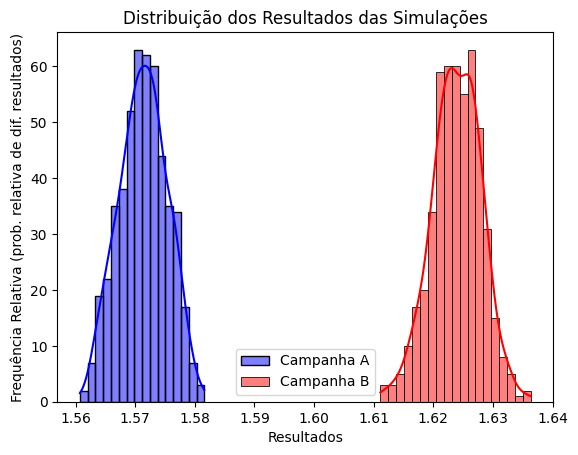

Campanha A: Wizard_On / Campanha B: Campanha_WizardOn_Q1_2024


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_simulation_results(results):
    sns.histplot(results['A'], color="blue", label='Campanha A', kde=True)
    sns.histplot(results['B'], color="red", label='Campanha B', kde=True)
    plt.xlabel('Resultados')
    plt.ylabel('Frequência Relativa (prob. relativa de dif. resultados)')
    plt.title('Distribuição dos Resultados das Simulações')
    plt.legend()
    plt.show()

plot_simulation_results(simulation_results)
print("Campanha A: Wizard_On / Campanha B: Campanha_WizardOn_Q1_2024" )

## Aplicação da Análise em outras campanhas

In [22]:
a_forms_subm = df_forms_hubstop[df_forms_hubstop['campanha'] == '3 semestres pelo preço de 2']['taxa_formularios_submetidos'].mean()
a_forms_subm

1.4047619047619049

In [23]:
b_forms_subm = df_forms_hubstop[df_forms_hubstop['campanha'] == 'Big Sale Padrão']['taxa_formularios_submetidos'].mean()
b_forms_subm

1.81

In [24]:
simulation_results_second_sim = run_simulation(a_forms_subm, b_forms_subm)
simulation_results_second_sim

,A,B
0,1.403995,1.809432
1,1.402479,1.810416
2,1.409627,1.816396
3,1.399796,1.810726
4,1.412869,1.812315
...,...,...
495,1.409559,1.815715
496,1.405031,1.807197
497,1.405186,1.812014
498,1.409730,1.811761


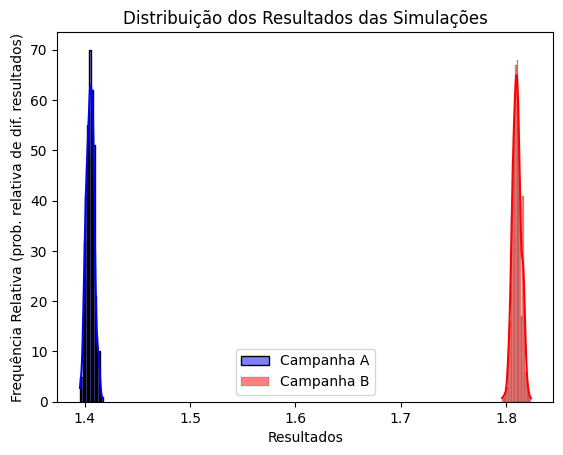

Campanha A: 3 semestres pelo preço de 2 / Campanha B: Big Sale Padrão


In [25]:
plot_simulation_results(simulation_results_second_sim)
print("Campanha A: 3 semestres pelo preço de 2 / Campanha B: Big Sale Padrão" )

## Análise dos Resultados (Gráfico 2.2):

Distribuição dos Resultados:

- Campanha A (Azul): A distribuição é estreita e altamente concentrada em torno de 1.4. Isso sugere que a campanha A tem uma taxa de submissão média bastante estável e previsível. A variação é mínima, o que indica que, independentemente das simulações, os resultados tendem a ser consistentes.

- Campanha B (Vermelho): A distribuição é igualmente estreita, mas com uma média significativamente mais alta, em torno de 1.8. Assim como a Campanha A, a Campanha B mostra pouca variação nos resultados entre as simulações, mas a eficácia é claramente superior.

Interpretação das Médias e Variâncias:

- Média mais alta para a Campanha B: A posição mais à direita da curva vermelha indica que a Campanha B tem uma taxa de submissão média mais alta do que a Campanha A. Isso pode ser atribuído ao impacto de uma promoção "Big Sale Padrão" ser mais atraente ou eficaz em comparação com a oferta de "3 semestres pelo preço de 2".

- Consistência nas Campanhas: Ambas as campanhas mostram baixa variabilidade em seus resultados. Isso é positivo, pois sugere que independentemente das condições externas ou da variação nas entradas da simulação, as taxas de conversão dessas campanhas tendem a ser estáveis.

### Insights extraídos

Baseado apenas na taxa de submissão de formulários, algumas campanhas podem ser baseadas para escolha dado seu maior retorno médio sobre as simulações, no entanto a maioria dessas altas, são atribuídas a campanhas de promoção "exacerbadas". Olhando para a Consistência e Impacto, enquanto algumas campanhas oferecem resultados consistentes, talvez o "impacto" das campanhas seja uma variável a ser considerads, de acordo com altos picos de sessões. Isso pode influenciar decisões estratégicas sobre qual campanha é mais provável de atingir objetivos de marketing mais "ambiciosos".

Considerando a estabilidade dos resultados, a maioria dos tipos de campanhas podem ser otimizados com ajustes finos sem o risco de grandes variações nos resultados. No entanto, a taxa de submissões atribuída aqui tende a ser baixa para as expectativas de atuação da Wizard. E isto talvez sugira para mudanças mais drásticas nas campanhas afim de atingir resultados melhores.

## Conclusão

A utilização de simulações de Monte Carlo para analisar a taxa de formulários únicos submetidos em diferentes campanhas de marketing da Wizard, nos revelou insights valiosos sobre a eficiência de tais abordagens em engajar e captar o interesse dos usuários. A análise detalhada dos resultados permitiu identificar padrões de desempenho que são cruciais para o planejamento estratégico e a otimização de campanhas futuras.

### Consistência e Previsibilidade:

Os resultados demonstraram uma consistência nas taxas de formulários únicos submetidos, com pouca variação nos resultados ao longo de diferentes simulações. Esta consistência é indicativa de que as estratégias testadas possuem um nível de previsibilidade que pode ser capitalizado para maximizar a eficácia das campanhas, garantindo que recursos de marketing sejam investidos de maneira mais calculada e com expectativas de retorno mais seguras. Em contraponto, esta previsibilidade age também negativamente para as tentativas de estratégia de aumento dessa taxa (tendo em vista que não há mudanças muito diferentes nas campanhas).

### Impacto das Estratégias Promocionais:

Foi observado que determinadas estratégias têm um impacto maior quando comparadas individualmente na quantidade de formulários submetidos, o que sugere uma priorização de uma campanha a outra. No entanto, estas campanhas "vencedoras" não possuem resultados significantes em termos de longo prazo e tendo em vista a quantidade de campanhas feita. Isso reforça a importância de escolher e implementar abordagens que não só atraem atenção, mas que efetivamente incentivam os usuários a tomar ações concretas, e consistentes.

### Implicações para Otimização:

Os dados gerados pelas simulações fornecem uma base sólida para otimização contínua de campanhas. Compreender quais estratégias resultam em maiores taxas de formulários únicos submetidos permite às equipes de marketing ajustar suas táticas, focando em métodos que demonstram maior eficácia, e reconsiderar ou modificar aqueles que produzem resultados inferiores.

### Recomendações para Ações Futuras:

Para futuras campanhas, recomenda-se a implementação de estratégias diversificadas, testando diferentes abordagens promocionais de maneira drástica, visando o aumento da taxa de submissão. Isso não só ajudará a identificar quais estratégias são mais eficazes em termos de engajamento do usuário, mas também permitirá ajustes finos antes de investimentos significativos serem feitos. Além disso, a análise contínua dos resultados de campanhas através de técnicas como a simulação de Monte Carlo deve continuar a ser uma prática padrão para garantir que as decisões de marketing sejam sempre orientadas por dados.


Obs: importante citar que as simulações realizadas pelo grupo, não servirão de "verdade absoluta" para a aplicação de mudanças na Landing Page.